**IMPORTS**

In [1]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


**FUNCTIONS**

In [2]:
def erdos_renyi_Gnm(n,m,p,self_edges): #this function is leaning away from my dependency on networkx
    #m = number of edges, n = number of nodes, #p = probability
    max_edges = n*(n - 1)/2
    if m > max_edges and self_edges == False: #quick check to prevent an infinite while loop
        print("Exceeds maximum edges.") #particularly useful in larger matrices
        return #doesn't waste a user's time, by exiting quickly
    elif m > (n**2 + n)/2 and self_edges == True:
        print("Exceeds maximum edges.") #particularly useful in larger matrices
        return #doesn't waste a user's time, by exiting quickly
    A = zeros((n,n)) #adjacency matrix
    remaining_edges = m #amount of edges to be added
    while remaining_edges > 0: #while instead of for loop, to ensure edges are added correctly
        x = random.randint(0,n)#entry of the matrix
        y = random.randint(0,n)
        P = random.random()
        if P <= p:
            if (A[x,y] != 1):
                if x == y and self_edges == True:
                    A[x,y] = 1 #doesn't already exist
                    A[y,x] = 1
                    remaining_edges -= 1 #successful iteration in adding an edge
                elif x != y:
                    A[x,y] = 1 #doesn't already exist
                    A[y,x] = 1
                    remaining_edges -= 1
                else:
                    remaining_edges *= 1
        else:
            remaining_edges -= 1
    return A

In [3]:
def max_edges(n):
    return n*(n-1)/2

In [4]:
def SBM(n,m,p,q):
    A = zeros((int(n),int(n)))
    if n % 2 != 0:
        print("Please input an even node system!")
        return
    N = int(n/2)
    X = erdos_renyi_Gnm(N,m,p,False)
    A[0:N,0:N] = X
    Y = erdos_renyi_Gnm(N,m,p,False)
    A[N:n,N:n] = Y
    out = erdos_renyi_Gnm(N,int((N+1)/(N-1)*m),q,True)
    A[0:N,N:n] = out
    A[N:n,0:N] = np.swapaxes(out,1,0)
    return A

In [5]:
def adding_outside(A,k):
    number_additions = k
    oopsies = 0 
    N = len(A)
    n = int(N/2)
    ones = np.ones(N)
    new_matrix = np.copy(A)
    a = np.copy(A[0:n,n:N])
    while number_additions > 0: 
        x = random.randint(0,len(a)) 
        y = random.randint(0,len(a)) 
        m = np.sum(a)/2
        if m > n**2/2:
            break
        elif (int(a[x,y]) == 0): #to make sure that
            a[x,y] = 1     
            number_additions -= 1 
            oopsies = 0
        else: 
            oopsies += 1 
        if oopsies > len(a)**2: 
            print("Cannot add further. " + str(number_additions) + " rewires remaining.")
            return
    
    new_matrix[0:n,n:N] = a
    new_matrix[n:N,0:n] = np.swapaxes(a,1,0)
    
    return new_matrix

In [6]:
def M_entropy(A): #fundamental VNE
    m = np.sum(A)/2 #easier to pull the edges from the adjacency rather than to store them
    L = np.diag(np.sum(A,axis = 0)) - A
    l = eigvalsh(L)
    h_0 = 0 #entropy value, h is used in your research paper
    for i in l:
        u = i/(2*m) #easier to write out this way
        if u <= 0: #otherwise domain error in the weird instance where eigvals are less than 0
            h_0 = h_0
        else: 
            h_0 += u*math.log(u, 2)
    return -h_0 #could just replace += with -= but this works also

In [7]:
def B_entropy(A,s): 
    L = np.diag(np.sum(A,axis = 0)) - A
    l = eigvalsh(L)
    h_0 = 0 
    denominator = 0
    z = zeros(len(l))
    for j in range(len(l)):
        z[j] = math.exp(-s*l[j])
    denominator = np.sum(z)
    for i in range(len(l)):
        u = z[i]/denominator 
        h_0 += u*math.log(u, 2)
    return -h_0 #could just replace += with -= but this works also

**GENERAL STRUCTURE OF NETWORKS**

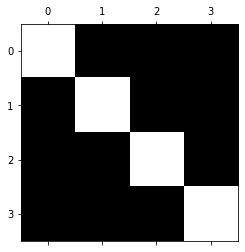

In [8]:
A = SBM(4,max_edges(2),1,1)
A[0,1] = 100
A[1,0] = 100
spy(A)

C:\Users\kazim\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


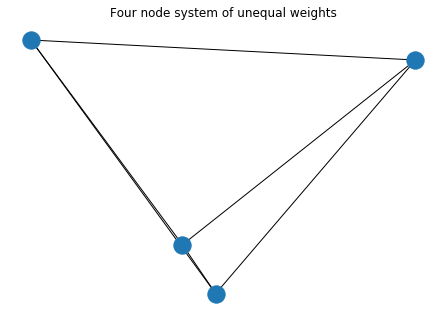

In [9]:
nx.draw(nx.from_numpy_matrix(A))
plt.title('Four node system of unequal weights')
plt.savefig("figure_2.png")

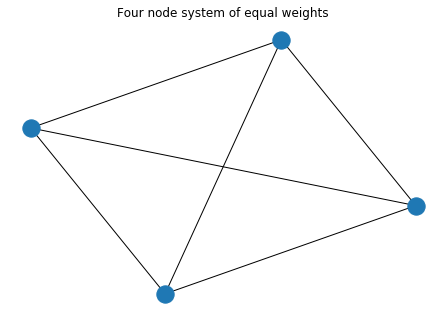

In [10]:
nx.draw(nx.from_numpy_matrix(A = SBM(4,max_edges(2),1,1)))
plt.title('Four node system of equal weights')
plt.savefig("figure_1.png")

**HISTOGRAMS**

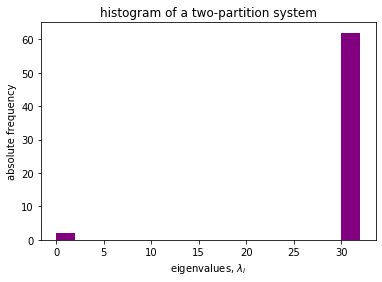

In [11]:
A = SBM(64,max_edges(32),1,0)
L = np.diag(np.sum(A,axis = 0)) - A
eigs,vecs = np.linalg.eigh(L)
plt.hist(eigs,bins = int(0.25*len(eigs)), color = 'purple')
plt.xlabel(r'eigenvalues, $\lambda_i$')
plt.ylabel('absolute frequency')
plt.title('histogram of a two-partition system')
plt.savefig('figure_3.png')

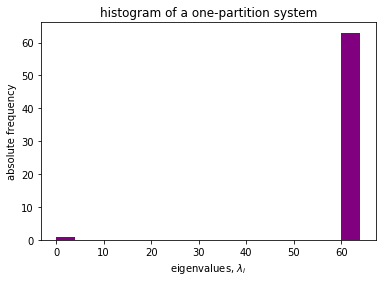

In [12]:
A = SBM(64,max_edges(32),1,1)
L = np.diag(np.sum(A,axis = 0)) - A
eigs,vecs = np.linalg.eigh(L)
plt.hist(eigs,bins = int(0.25*len(eigs)), color = 'purple')
plt.xlabel(r'eigenvalues, $\lambda_i$')
plt.ylabel('absolute frequency')
plt.title('histogram of a one-partition system')
plt.savefig('figure_4.png')

In [13]:
A = SBM(2000,max_edges(1000),0.5,0.5)
L = np.diag(np.sum(A,axis = 0)) - A
eigs,vecs = np.linalg.eigh(L)

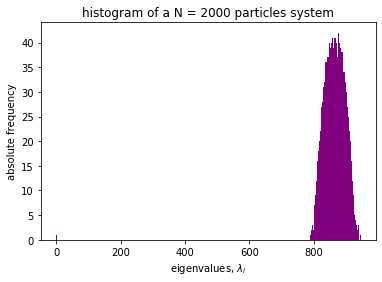

In [14]:
plt.hist(eigs,bins = int(0.25*len(eigs)), color = 'purple')
plt.xlabel(r'eigenvalues, $\lambda_i$')
plt.ylabel('absolute frequency')
plt.title('histogram of a N = 2000 particles system')
plt.savefig('figure_5.png')

**ENTROPY**

In [16]:
m_entropy = []
nodes = []
b_entropy = []
for i in range(2,32):
    nodes.append(2*i)
    m = np.sum(A)/2
    A = SBM(2*i,max_edges(i),1,0)
    m_entropy.append(M_entropy(A))
    b_entropy.append(B_entropy(A,m/(2*i)))

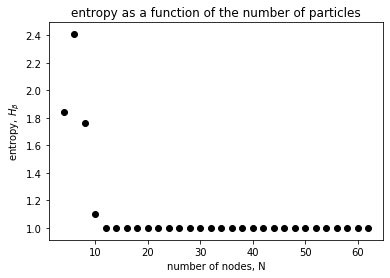

In [17]:
plt.scatter(nodes,b_entropy,color = 'black')
plt.xlabel('number of nodes, N')
plt.ylabel(r'entropy, $H_\beta$')
plt.title('entropy as a function of the number of particles')
plt.savefig('figure_6.png')

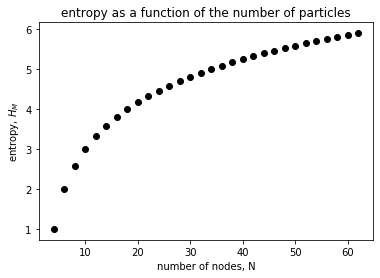

In [18]:
plt.scatter(nodes,m_entropy, color = 'black')
plt.xlabel('number of nodes, N')
plt.ylabel(r'entropy, $H_M$')
plt.title('entropy as a function of the number of particles')
plt.savefig('figure_7.png')

**ENTROPY AS A FUNCTION OF TIME**

In [12]:
def entropy_as_time(N):
    A = SBM(N,max_edges(N/2),1,0)
    A_new = A
    edges_added = 0
    m_entropy = []
    b_entropy = []
    while edges_added < N*N/4:
        m_entropy.append(M_entropy(A_new))
        b_entropy.append(B_entropy(A_new,1))
        A_new = adding_outside(A_new,1)
        edges_added += 1
    return m_entropy,b_entropy,edges_added

In [13]:
x = [16,32,64,128]

In [14]:
x_map = {} #if this throws errors, try rerunning the above 3 cells over again
for i in x:
    x_map[i] = entropy_as_time(i)

In [15]:
H_4M = x_map[16][0]
H_4B = x_map[16][1]
H_16M = x_map[32][0]
H_16B = x_map[32][1]
H_32M = x_map[64][0]
H_32B = x_map[64][1]
H_64M = x_map[128][0]
H_64B = x_map[128][1]
E = x_map[128][2]

to_be_fixed = [H_4M,H_4B,H_16M,H_16B,H_32M,H_32B]

In [16]:
fixed = []
for i in to_be_fixed:
    j = i.copy()
    for k in range(E - len(i)):
        j.append(j[-1])
    fixed.append(j)

In [17]:
h_4M = fixed[0]
h_4B = fixed[1]
h_16M = fixed[2]
h_16B = fixed[3]
h_32M = fixed[4]
h_32B = fixed[5]

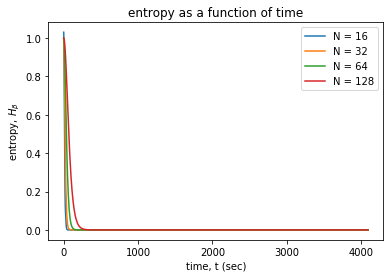

In [41]:
l1, = plt.plot(np.arange(E),h_4B)
l2, = plt.plot(np.arange(E),h_16B)
l3, = plt.plot(np.arange(E),h_32B)
l4, = plt.plot(np.arange(E),H_64B)
plt.ylabel(r'entropy, $H_\beta$')
plt.xlabel('time, t (sec)')
plt.legend((l1,l2,l3,l4),("N = 16","N = 32","N = 64","N = 128"))
plt.title('entropy as a function of time')
plt.savefig('figure_8.png')

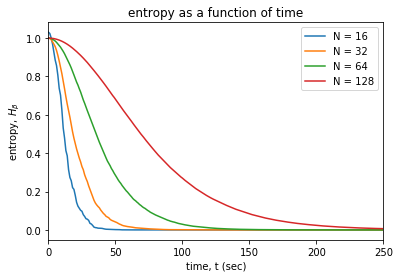

In [18]:
l1, = plt.plot(np.arange(E),h_4B)
l2, = plt.plot(np.arange(E),h_16B)
l3, = plt.plot(np.arange(E),h_32B)
l4, = plt.plot(np.arange(E),H_64B)
plt.xlim(0,250)
plt.ylabel(r'entropy, $H_\beta$')
plt.xlabel('time, t (sec)')
plt.legend((l1,l2,l3,l4),("N = 16","N = 32","N = 64","N = 128"))
plt.title('entropy as a function of time')
plt.savefig('figure_9.png')

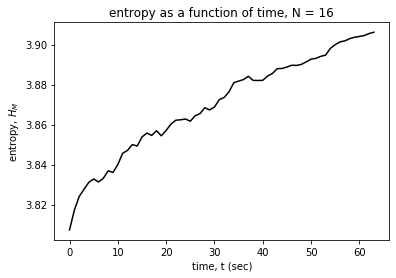

In [19]:
plt.plot(np.arange(len(H_4M)),H_4M,color = 'black')
plt.title('entropy as a function of time, N = 16')
plt.ylabel(r'entropy, $H_M$')
plt.xlabel('time, t (sec)')
plt.savefig('figure_10a.png')

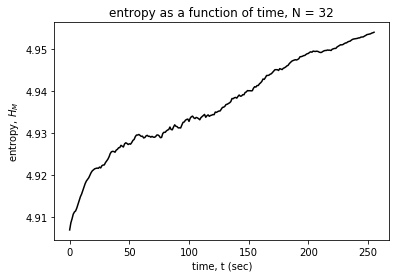

In [20]:
plt.plot(np.arange(len(H_16M)),H_16M,color = 'black')
plt.title('entropy as a function of time, N = 32')
plt.ylabel(r'entropy, $H_M$')
plt.xlabel('time, t (sec)')
plt.savefig('figure_10b.png')

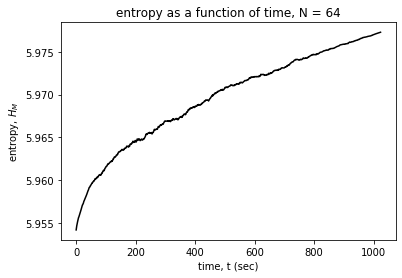

In [21]:
plt.plot(np.arange(len(H_32M)),H_32M,color = 'black')
plt.title('entropy as a function of time, N = 64')
plt.ylabel(r'entropy, $H_M$')
plt.xlabel('time, t (sec)')
plt.savefig('figure_10c.png')

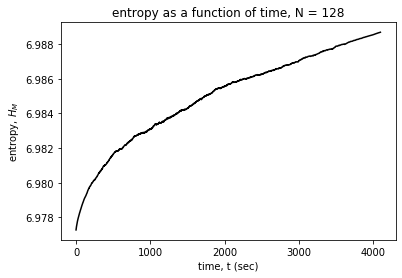

In [22]:
plt.plot(np.arange(len(H_64M)),H_64M,color = 'black')
plt.title('entropy as a function of time, N = 128')
plt.ylabel(r'entropy, $H_M$')
plt.xlabel('time, t (sec)')
plt.savefig('figure_10d.png')

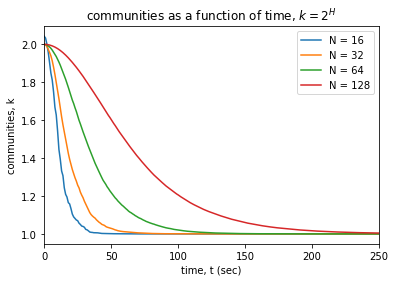

In [23]:
l1, = plt.plot(np.arange(E),np.power(2,h_4B))
l2, = plt.plot(np.arange(E),np.power(2,h_16B))
l3, = plt.plot(np.arange(E),np.power(2,h_32B))
l4, = plt.plot(np.arange(E),np.power(2,H_64B))
plt.xlim(0,250)
plt.ylabel('communities, k')
plt.xlabel('time, t (sec)')
plt.legend((l1,l2,l3,l4),("N = 16","N = 32","N = 64","N = 128"))
plt.title(r'communities as a function of time, $k = 2^H$')
plt.savefig('figure_11.png')

In [24]:
#feel free to play around.  most of the variables are named pretty obviously